# k-NN Classifier Demo

## Imports

In [31]:
%load_ext autoreload
%autoreload 2

from knn_classifier import knn_classifier, knn_classifier_cross_validation
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Classify Iris Dataset with k-NN Classifier

In [32]:
# Load the iris dataset
iris = load_iris()
features = iris.data
labels = iris.target

# Split the data into training and test sets (67% train, 33% test)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)

# Train the k-NN classifier with different k values
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = knn_classifier(k)
    knn.fit(train_features, train_labels)

    train_preds = knn.predict(train_features)
    train_acc = knn.accuracy(train_labels, train_preds)

    test_preds = knn.predict(test_features)
    test_acc = knn.accuracy(test_labels, test_preds)

    print(f'k={k}, Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}')

k=1, Train Accuracy: 1.000, Test Accuracy: 0.980
k=3, Train Accuracy: 0.960, Test Accuracy: 0.980
k=5, Train Accuracy: 0.960, Test Accuracy: 0.980
k=7, Train Accuracy: 0.960, Test Accuracy: 0.980
k=9, Train Accuracy: 0.950, Test Accuracy: 0.980


### Optimize k Value with Cross-Validation

In [33]:
k_values = np.arange(1, 11) # k values from 1 to 10
best = None 

# Perform 10-fold cross-validation to find the best k value
for k in k_values:
    knn = knn_classifier_cross_validation(k, 10)
    cv_acc = knn.cross_validate(train_features, train_labels)
    print(f'k={k}, Cross-Validation Accuracy: {cv_acc:.3f}')
    if best is None or cv_acc > best[1]:
        best = (k, cv_acc)
print(f'Best k={best[0]}, Cross-Validation Accuracy: {best[1]:.3f}')

# Train the k-NN classifier with the best k value
knn = knn_classifier(best[0])
knn.fit(train_features, train_labels)
test_preds = knn.predict(test_features)
test_acc = knn.accuracy(test_labels, test_preds)
print(f'Best k={best[0]}, Test Accuracy: {test_acc:.3f}')

k=1, Cross-Validation Accuracy: 0.940
k=2, Cross-Validation Accuracy: 0.940
k=3, Cross-Validation Accuracy: 0.940
k=4, Cross-Validation Accuracy: 0.930
k=5, Cross-Validation Accuracy: 0.940
k=6, Cross-Validation Accuracy: 0.940
k=7, Cross-Validation Accuracy: 0.930
k=8, Cross-Validation Accuracy: 0.940
k=9, Cross-Validation Accuracy: 0.930
k=10, Cross-Validation Accuracy: 0.930
Best k=1, Cross-Validation Accuracy: 0.940
Best k=1, Test Accuracy: 0.980


### Visualize Classification Results

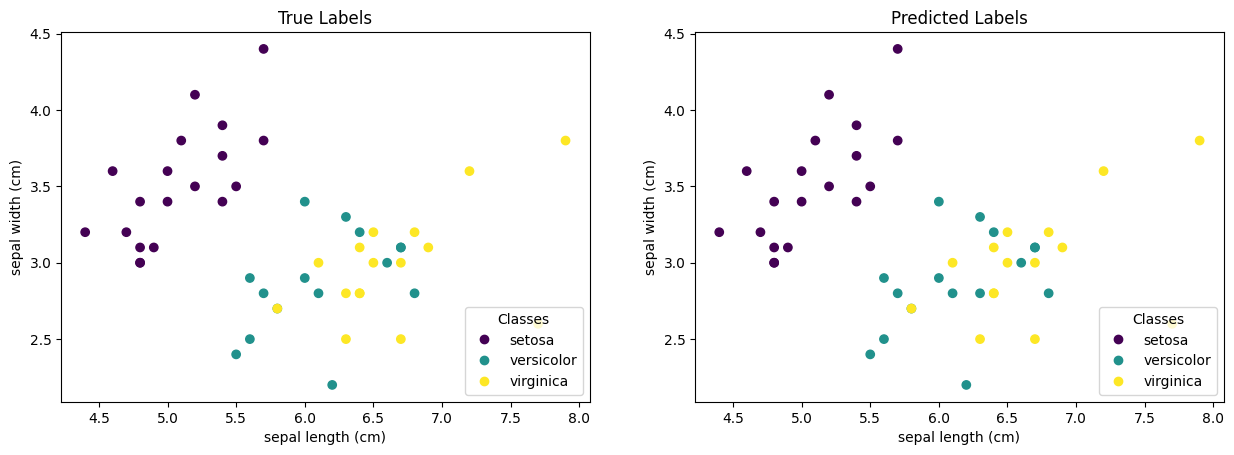

In [34]:
# Plot the true and predicted labels over the first two features
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)

ax1.set_title('True Labels')
scatter1 = ax1.scatter(test_features[:, 0], test_features[:, 1], c=test_labels)
ax1.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax1.legend(scatter1.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

ax2.set_title('Predicted Labels')
scatter2 = ax2.scatter(test_features[:, 0], test_features[:, 1], c=test_preds)
ax2.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax2.legend(scatter1.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")